### Install libs & import

In [1]:
#!pip install polars

In [2]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

### Read data

In [3]:
df = pl.read_csv('data/data.csv')
df.head()

productcategory,productsubcategory,saleterritory,zip,State,Customer,Employee,OrderCount,OrderDate,StandardCost,UnitPrice,ListPrice,SaleswithStandard,NetSales,OrderQuantity,Sales,Country_y,Territory,State_duplicated_0,StateCD,City_y
str,str,str,i64,str,str,str,i64,str,f64,f64,f64,f64,f64,i64,f64,str,str,str,str,str
"""Clothing""","""Caps""","""Northwest""",82601,"""Wyoming""","""François Ferri…","""David Campbell…",1,"""5/31/2011 0:00…",6.9223,5.1865,8.6442,20.7669,-5.2074,3,15.5595,"""US""","""Casper""","""Wyoming""","""WY""","""Natrona"""
"""Clothing""","""Caps""","""Northwest""",98104,"""Washington""","""Richard Bready…","""David Campbell…",1,"""5/31/2011 0:00…",6.9223,5.1865,8.6442,13.8446,-3.4716,2,10.373,"""US""","""Seattle""","""Washington""","""WA""","""King"""
"""Components""","""Mountain Frame…","""Northwest""",98371,"""Washington""","""Carolyn Farino…","""David Campbell…",1,"""5/31/2011 0:00…",739.041,714.7043,1191.1739,739.041,-24.3367,1,714.7043,"""US""","""Puyallup""","""Washington""","""WA""","""Pierce"""
"""Clothing""","""Jerseys""","""Northwest""",82601,"""Wyoming""","""François Ferri…","""David Campbell…",1,"""5/31/2011 0:00…",38.4923,28.8404,48.0673,76.9846,-19.3038,2,57.6808,"""US""","""Casper""","""Wyoming""","""WY""","""Natrona"""
"""Clothing""","""Jerseys""","""Northwest""",98104,"""Washington""","""Richard Bready…","""David Campbell…",1,"""5/31/2011 0:00…",38.4923,28.8404,48.0673,76.9846,-19.3038,2,57.6808,"""US""","""Seattle""","""Washington""","""WA""","""King"""


In [4]:
df.describe

<bound method DataFrame.describe of shape: (38_802, 21)
┌─────────────────┬──────────────────┬───────────────┬───────┬───┬───────────┬──────────────────┬─────────┬────────────┐
│ productcategory ┆ productsubcatego ┆ saleterritory ┆ zip   ┆ … ┆ Territory ┆ State_duplicated ┆ StateCD ┆ City_y     │
│ ---             ┆ ry               ┆ ---           ┆ ---   ┆   ┆ ---       ┆ _0               ┆ ---     ┆ ---        │
│ str             ┆ ---              ┆ str           ┆ i64   ┆   ┆ str       ┆ ---              ┆ str     ┆ str        │
│                 ┆ str              ┆               ┆       ┆   ┆           ┆ str              ┆         ┆            │
╞═════════════════╪══════════════════╪═══════════════╪═══════╪═══╪═══════════╪══════════════════╪═════════╪════════════╡
│ Clothing        ┆ Caps             ┆ Northwest     ┆ 82601 ┆ … ┆ Casper    ┆ Wyoming          ┆ WY      ┆ Natrona    │
│ Clothing        ┆ Caps             ┆ Northwest     ┆ 98104 ┆ … ┆ Seattle   ┆ Washington       ┆

In [5]:
df.shape

(38802, 21)

### Expression syntax

In [ ]:
df.columns

In [6]:
#df.select('productcategory')
df.select('productcategory').unique()

productcategory
str
"""Clothing"""
"""Components"""
"""Bikes"""
"""Accessories"""


In [7]:
df.select('productcategory','productsubcategory')

productcategory,productsubcategory
str,str
"""Clothing""","""Caps"""
"""Clothing""","""Caps"""
"""Components""","""Mountain Frame…"
"""Clothing""","""Jerseys"""
"""Clothing""","""Jerseys"""
"""Clothing""","""Jerseys"""
"""Clothing""","""Jerseys"""
"""Components""","""Road Frames"""
"""Clothing""","""Socks"""


In [8]:
df.select(pl.sum('Sales'),
          pl.col("productcategory").sort(),
    )

Sales,productcategory
f64,str
5.3603e7,"""Accessories"""
5.3603e7,"""Accessories"""
5.3603e7,"""Accessories"""
5.3603e7,"""Accessories"""
5.3603e7,"""Accessories"""
5.3603e7,"""Accessories"""
5.3603e7,"""Accessories"""
5.3603e7,"""Accessories"""
5.3603e7,"""Accessories"""


In [10]:
#df.filter(pl.col("Sales")>=200)
df.filter(pl.col("OrderQuantity").is_between(2,5))

productcategory,productsubcategory,saleterritory,zip,State,Customer,Employee,OrderCount,OrderDate,StandardCost,UnitPrice,ListPrice,SaleswithStandard,NetSales,OrderQuantity,Sales,Country_y,Territory,State_duplicated_0,StateCD,City_y
str,str,str,i64,str,str,str,i64,str,f64,f64,f64,f64,f64,i64,f64,str,str,str,str,str
"""Clothing""","""Caps""","""Northwest""",82601,"""Wyoming""","""François Ferri…","""David Campbell…",1,"""5/31/2011 0:00…",6.9223,5.1865,8.6442,20.7669,-5.2074,3,15.5595,"""US""","""Casper""","""Wyoming""","""WY""","""Natrona"""
"""Clothing""","""Caps""","""Northwest""",98104,"""Washington""","""Richard Bready…","""David Campbell…",1,"""5/31/2011 0:00…",6.9223,5.1865,8.6442,13.8446,-3.4716,2,10.373,"""US""","""Seattle""","""Washington""","""WA""","""King"""
"""Clothing""","""Jerseys""","""Northwest""",82601,"""Wyoming""","""François Ferri…","""David Campbell…",1,"""5/31/2011 0:00…",38.4923,28.8404,48.0673,76.9846,-19.3038,2,57.6808,"""US""","""Casper""","""Wyoming""","""WY""","""Natrona"""
"""Clothing""","""Jerseys""","""Northwest""",98104,"""Washington""","""Richard Bready…","""David Campbell…",1,"""5/31/2011 0:00…",38.4923,28.8404,48.0673,76.9846,-19.3038,2,57.6808,"""US""","""Seattle""","""Washington""","""WA""","""King"""
"""Clothing""","""Jerseys""","""Northwest""",98366,"""Washington""","""Peggy Justice""","""David Campbell…",1,"""5/31/2011 0:00…",38.4923,28.8404,48.0673,76.9846,-19.3038,2,57.6808,"""US""","""Port Orchard""","""Washington""","""WA""","""Kitsap"""
"""Components""","""Road Frames""","""Northwest""",98366,"""Washington""","""Peggy Justice""","""David Campbell…",1,"""5/31/2011 0:00…",352.1394,356.898,594.83,704.2788,9.5172,2,713.796,"""US""","""Port Orchard""","""Washington""","""WA""","""Kitsap"""
"""Bikes""","""Mountain Bikes…","""Northwest""",82601,"""Wyoming""","""François Ferri…","""David Campbell…",1,"""5/31/2011 0:00…",1898.0944,2024.994,3374.99,7592.3776,507.5984,4,8099.976,"""US""","""Casper""","""Wyoming""","""WY""","""Natrona"""
"""Bikes""","""Mountain Bikes…","""Northwest""",98104,"""Washington""","""Richard Bready…","""David Campbell…",1,"""5/31/2011 0:00…",1898.0944,2024.994,3374.99,3796.1888,253.7992,2,4049.988,"""US""","""Seattle""","""Washington""","""WA""","""King"""
"""Bikes""","""Mountain Bikes…","""Northwest""",82601,"""Wyoming""","""François Ferri…","""David Campbell…",1,"""5/31/2011 0:00…",1898.0944,2024.994,3374.99,3796.1888,253.7992,2,4049.988,"""US""","""Casper""","""Wyoming""","""WY""","""Natrona"""


In [11]:
df.group_by(by='productcategory').agg(pl.col('Sales').sum().alias('total_sales'))

productcategory,total_sales
str,f64
"""Components""",7.4339e6
"""Clothing""",1.0374e6
"""Bikes""",4.4828e7
"""Accessories""",303515.225606


### Query optimization in lazy eval

In [12]:
df_query = ( pl.scan_csv('data/data.csv')
           .filter(pl.col("Country_y") == "US")
           .select(["productcategory", "productsubcategory", "saleterritory", "Sales"])
           )

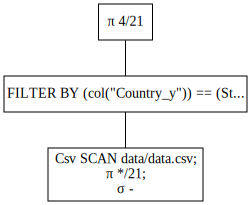

In [13]:
df_query.show_graph(optimized=False)

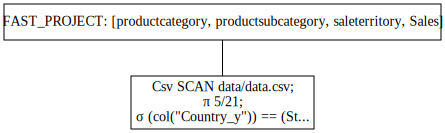

In [14]:
df_query.show_graph(optimized=True)

In [15]:
df2 = df_query.collect()

In [16]:
df2.head()

productcategory,productsubcategory,saleterritory,Sales
str,str,str,f64
"""Clothing""","""Caps""","""Northwest""",15.5595
"""Clothing""","""Caps""","""Northwest""",10.373
"""Components""","""Mountain Frame…","""Northwest""",714.7043
"""Clothing""","""Jerseys""","""Northwest""",57.6808
"""Clothing""","""Jerseys""","""Northwest""",57.6808
